## Identification des gènes spécifiques de tissus non exprimés dans le foie normal:

#### Importation des données

In [1]:
# importations de quelques bibliothèques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# dataset "TSG_7794"

# 7794 gènes spécifiques de tissus, non exprimés dans le foie normal, dans le dataset GTEX-NCBI.

expression_data_TSG_7794 = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/TSG_7794_thres_0.6_SNR_1.0_SRR_4.0_SIG_1.0_liver.csv",sep=";")

In [4]:
# dataset "GSE121248"

expression_data_GSE121248 = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE121248_GSE121248_log_expression_107_samples_21872_genes.csv", sep=";")

In [5]:
# dataset "GSE112790"

expression_data_GSE112790 = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE112790_GSE112790_log_expression_198_samples_21857_genes.csv", sep=";")

In [6]:
# dataset "GSE76427" 

expression_data_GSE76427 = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE76427_GSE76427_log_expression_167_samples_30499_genes.csv", sep=";")

In [7]:
# dataset "GSE141202"

expression_data_GSE141202 = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE141202_log_rpkm_206_samples_38133_genes.csv", sep=";")

In [8]:
# dataset "GSE144269"

expression_data_GSE144269 = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE144269_log_rpkm_140_samples_31263_genes.csv", sep=";")

In [9]:
# dataset "TCGA-LIHC"

expression_data_TCGA_LIHC = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_tcga_lihc_TCGA-LIHC_log_fpkm_439_samples_43022_genes.csv", sep=";")

### Travail à faire:

Le but est ici, de croiser les 7794 gènes avec les gènes réellement disponibles dans les données du cancer du foie(datasets importés ci-dessus) et de calculer le nombre de gènes disponibles.

Nous allons recupérer les colones 'gene_symbol' dans chaque dataset afin de faire l'intersection. 

In [10]:
gene_symbol_TCGA_LIHC = expression_data_TCGA_LIHC['gene_symbol'].values

gene_symbol_GSE144269 = expression_data_GSE144269['gene_symbol'].values

gene_symbol_GSE141202 = expression_data_GSE141202['gene_symbol'].values

gene_symbol_GSE76427 = expression_data_GSE76427['gene_symbol'].values

gene_symbol_GSE112790 = expression_data_GSE112790['gene_symbol'].values

gene_symbol_GSE121248 = expression_data_GSE121248['gene_symbol'].values

gene_symbol_TSG_7794 = expression_data_TSG_7794['gene_symbol'].values

In [11]:
liste1 = [gene for gene in gene_symbol_TCGA_LIHC if (gene in  gene_symbol_GSE144269) & (gene in gene_symbol_GSE141202 )]

In [12]:
liste2 = [gene for gene in gene_symbol_GSE76427 if (gene in gene_symbol_GSE112790) & (gene in gene_symbol_GSE121248)]

In [13]:
liste_final = [gene for gene in gene_symbol_TSG_7794 if (gene in liste1) & (gene in liste2)]

In [14]:
len(set(liste_final))

3177

**Note:** Au final, nous avons 3177 gènes spécifiques de tissus non exprimés dans le foie normal et présents dans tous les datasets dont on dispose. 

Pour ces gènes, nous allons faire un graphique qui représente le nombre de gènes prédominants par tissu.

### Représentation graphique du nombre de gènes prédominants par tissue:

In [15]:
# mise à jour de 'TSG_7794' afin de recupérer les données dont les gènes sont présents dans les 3177 gènes 

expression_data_TSG_7794  = expression_data_TSG_7794[expression_data_TSG_7794['gene_symbol'].isin(liste_final)]

In [16]:
expression_data_TSG_7794.head()

,idx,id_gene,gene_symbol,tissue,SNR,SRR,signal_tissue,ref_tissue_1,signal_ref_tissue_1,SRR_1
0,A4GNT_stomach,51146.0,A4GNT,stomach,1.40,14.13,1.41,liver,0.1,14.13
3,AADACL2_skin,344752.0,AADACL2,skin,3.03,44.50,4.45,liver,0.1,44.50
5,AANAT_testis,15.0,AANAT,testis,3.12,15.53,1.55,liver,0.1,15.53
7,AATBC_skin,284837.0,AATBC,skin,1.49,18.49,1.85,liver,0.1,18.49
8,ABCA12_skin,26154.0,ABCA12,skin,1.99,34.28,3.43,liver,0.1,34.28


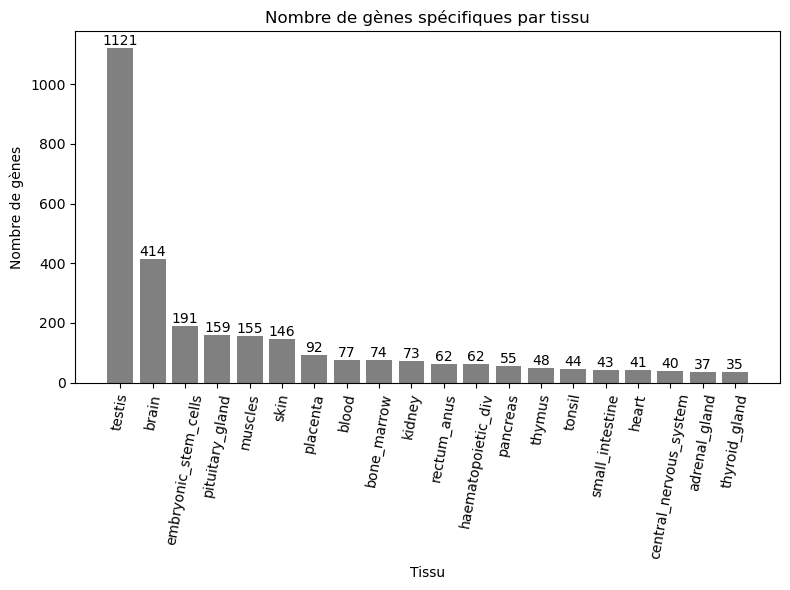

In [17]:
# Au départ, nous avons 3177 gènes.
# Représenter le nombre de gènes dans chacun de leur tissu prédominant.

# Configuration de l'affichage
plt.figure(figsize=(8, 6))
plt.xticks(rotation=80)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xlabel('Tissu')
plt.ylabel('Nombre de gènes')
plt.title('Nombre de gènes spécifiques par tissu')

# Calculer le nombre de gènes par tissu et prendre les 20 premiers
gene_counts = expression_data_TSG_7794['tissue'].value_counts().head(20)
bars = plt.bar(gene_counts.index, gene_counts.values, color='grey')

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')  # ajustement vertical et horizontal

plt.tight_layout()
plt.show()
